# Regression and residual plots

Linear regression is a useful tool for understanding the relationship between numerical variables. Seaborn has simple but powerful tools for examining these relationships.

For these exercises, we will look at some details from the US Department of Education on 4 year college tuition information and see if there are any interesting insights into which variables might help predict tuition costs.

In [1]:
#Importing packages
import io 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading csv
df=pd.read_csv("datasets//college_datav3.csv")
print(df.head())

                                INSTNM    OPEID  REGION  SAT_AVG_ALL  PCTPELL  \
0             Alabama A & M University   100200       5        850.0   0.7249   
1  University of Alabama at Birmingham   105200       5       1147.0   0.3505   
2                   Amridge University  2503400       5          NaN   0.7455   
3  University of Alabama in Huntsville   105500       5       1221.0   0.3179   
4             Alabama State University   100500       5        844.0   0.7567   

   PCTFLOAN  ADM_RATE_ALL       UG  AVGFACSAL COMPL_RPY_5YR_RT  ... CONTROL  \
0    0.8159      0.653841   4380.0     7017.0      0.477631579  ...       1   
1    0.5218      0.604275  10331.0    10221.0      0.673230442  ...       1   
2    0.8781           NaN     98.0     3217.0      0.636363636  ...       2   
3    0.4589      0.811971   5220.0     9514.0      0.762222222  ...       1   
4    0.7692      0.463858   4348.0     7940.0       0.43006993  ...       1   

  WOMENONLY  MENONLY  LOCALE  Tuition 

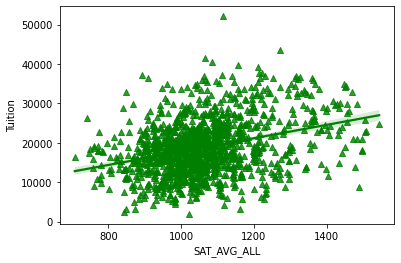

<Figure size 432x288 with 0 Axes>

In [3]:
#Plot a regression plot comparing Tuition and average SAT scores(SAT_AVG_ALL).
sns.regplot(data=df,
         y='Tuition',
         x="SAT_AVG_ALL",
         marker='^',
         color='g')

plt.show()
plt.clf()


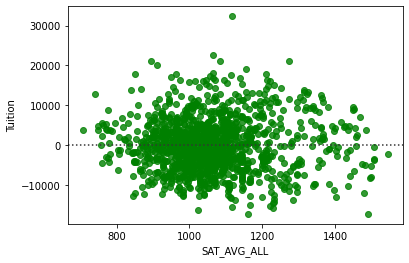

<Figure size 432x288 with 0 Axes>

In [4]:
#Use a residual plot to determine if the relationship looks linear.
sns.residplot(data=df,
          y='Tuition',
          x="SAT_AVG_ALL",
          color='g')

plt.show()
plt.clf()


Excellent! There does appear to be a linear relationship between tuition and SAT scores.

The residual plot is a very useful plot for understanding the appropriateness of a regression model

## Regression plot parameters
Seaborn's regression plot supports several parameters that can be used to configure the plots and drive more insight into the data.

For the next exercise, we can look at the relationship between tuition and the percent of students that receive Pell grants. A Pell grant is based on student financial need and subsidized by the US Government. In this data set, each University has some percentage of students that receive these grants. Since this data is continuous, using x_bins can be useful to break the percentages into categories in order to summarize and understand the data

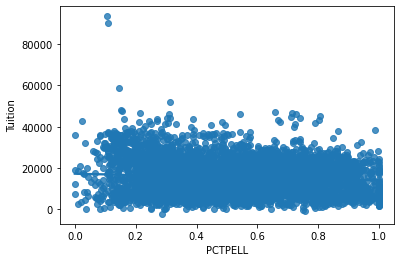

<Figure size 432x288 with 0 Axes>

In [5]:
#Plot a regression plot of Tuition and PCTPELL.
sns.regplot(data=df,
            y='Tuition',
            x="PCTPELL")
plt.show()
plt.clf()

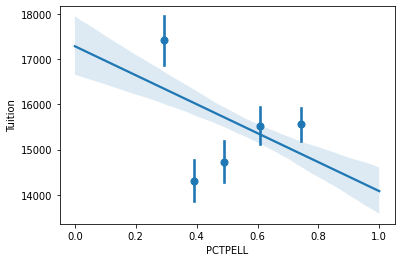

<Figure size 432x288 with 0 Axes>

In [6]:
#Create another plot that breaks the PCTPELL column into 5 different bins.
sns.regplot(data=df,
            y='Tuition',
            x="PCTPELL",
            x_bins=5)

plt.show()
plt.clf()

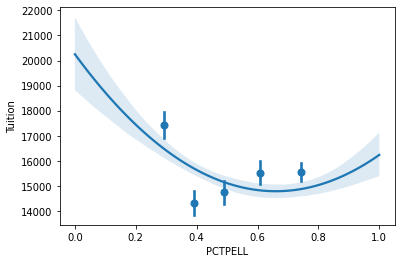

<Figure size 432x288 with 0 Axes>

In [7]:
#Create a final regression plot that includes a 2nd order polynomial regression line.
sns.regplot(data=df,
            y='Tuition',
            x="PCTPELL",
            x_bins=5,
            order=2)

plt.show()
plt.clf()

The regplot function is a very powerful tool for quickly analyzing data. Unfortunately these are too sensitive to the outliers



## Binning data

When the data on the x axis is a continuous value, it can be useful to break it into different bins in order to get a better visualization of the changes in the data.

For this exercise, we will look at the relationship between tuition and the Undergraduate population abbreviated as UG in this data. We will start by looking at a scatter plot of the data and examining the impact of different bin sizes on the visualization.

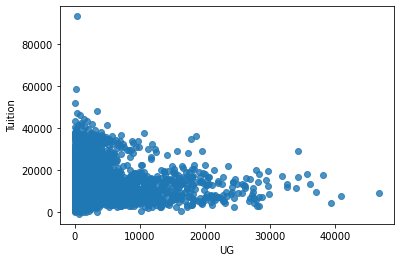

<Figure size 432x288 with 0 Axes>

In [8]:
#Create a regplot of Tuition and UG and set the fit_reg parameter to False to disable the regression line.
sns.regplot(data=df,
            y='Tuition',
            x="UG",
            fit_reg=False)

plt.show()
plt.clf()

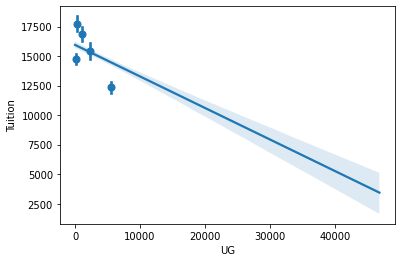

<Figure size 432x288 with 0 Axes>

In [9]:
sns.regplot(data=df,
            y='Tuition',
            x="UG",
            x_bins=5)

plt.show()
plt.clf()


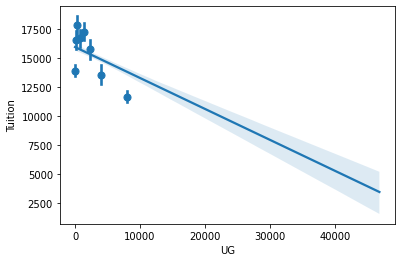

<Figure size 432x288 with 0 Axes>

In [10]:
# Create a regplot and bin the data into 8 bins
sns.regplot(data=df,
         y='Tuition',
         x="UG",
         x_bins=8)

plt.show()
plt.clf()

## Matrix Plots

The heatmap is the most common type of matrix plot and can be easily created by Seaborn. These types of matrix plots can be useful for quickly seeing trends in a dataset.

One common usage for a heatmap is to visually represent the correlation between variables.


### Creating heatmaps
A heatmap is a common matrix plot that can be used to graphically summarize the relationship between two variables. For this exercise, we will start by looking at guests of the Daily Show from 1999 - 2015 and see how the occupations of the guests have changed over time.

The data includes the date of each guest appearance as well as their occupation. For the first exercise, we need to get the data into the right format for Seaborn's heatmap function to correctly plot the data

In [11]:
#Reading csv
data=pd.read_csv("datasets//daily_show_guests_cleaned.csv")
print(data.head())

   YEAR GoogleKnowlege_Occupation     Show   Group    Raw_Guest_List
0  1999                     actor  1/11/99  Acting    Michael J. Fox
1  1999                  Comedian  1/12/99  Comedy   Sandra Bernhard
2  1999        television actress  1/13/99  Acting     Tracey Ullman
3  1999              film actress  1/14/99  Acting  Gillian Anderson
4  1999                     actor  1/18/99  Acting  David Alan Grier


In [12]:
# Create a crosstab table of the data
pd_crosstab =pd.crosstab(data["Group"], data["YEAR"])
print(pd_crosstab)

YEAR            1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  \
Group                                                                        
Academic           0     0     2     0     4     1    12     9    13     5   
Acting           108   100    92    84    74    51    44    44    25    26   
Advocacy           0     1     0     1     0     4     0     0     2     3   
Athletics          0     3     1     2     0     2     2     5     4     1   
Business           0     1     0     0     0     2     1     1     2     1   
Clergy             0     0     0     1     1     1     0     0     1     0   
Comedy            25    12    11     5    12     7     5     8     9     7   
Consultant         0     0     0     0     1     4     1     4     2     3   
Government         0     0     2     1     2     3     1     3     1     0   
Media             11    21    31    42    41    45    54    47    47    77   
Military           0     0     0     0     0     0     1     1  

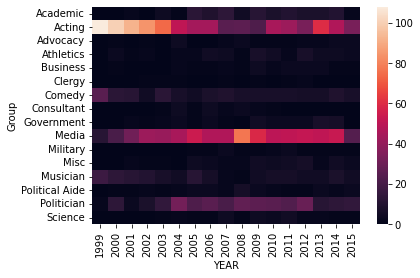

In [20]:
# Plot a heatmap of the table
sns.heatmap(pd_crosstab)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()


### Customizing heatmaps
Seaborn supports several types of additional customizations to improve the output of a heatmap.

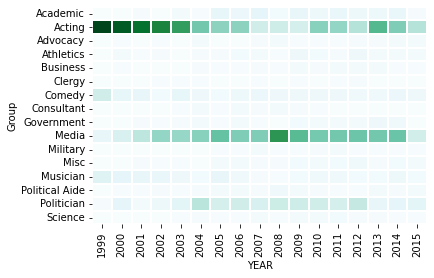

<Figure size 432x288 with 0 Axes>

In [22]:
# Create the crosstab DataFrame
pd_crosstab = pd.crosstab(data["Group"], data["YEAR"])

# Plot a heatmap of the table with no color bar and using the BuGn palette
sns.heatmap(pd_crosstab, cbar=False, cmap="BuGn", linewidths=0.3)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

#Show the plot
plt.show()
plt.clf()